# Polychromatic image formation with masks and lenses

**Creating an instance**

In [1]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY

from diffractio.utils_math import nearest2, nearest

number of processors: 8


In [2]:
from matplotlib import rcParams
rcParams['figure.figsize']=[6,6]
rcParams['figure.dpi']=75

**Creating a light beam**.
An instance must be created before starting to operate with light sources. The initialization accepts several arguments.     

In [3]:
wavelength=0.5*um
x0=np.linspace(-1*mm, 1*mm, 2048)
y0=np.linspace(-1*mm, 1*mm, 2048)

In [4]:
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength, info='u0')
u0.plane_wave()

# Masks

In [5]:
t0_point = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength, info='t0')
t0_point.dots(r0=(0,0))
print(t0_point.u.sum())

1.0


In [6]:
x0p=1000*np.random.rand(10,1)-1000
y0p=1000*np.random.rand(10,1)-1000
r0_multi=(x0p,y0p)
len(r0_multi[0])

t0_points = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength, info='t0')
t0_points.dots(r0=r0_multi)
print(t0_points.u.sum())

10.0


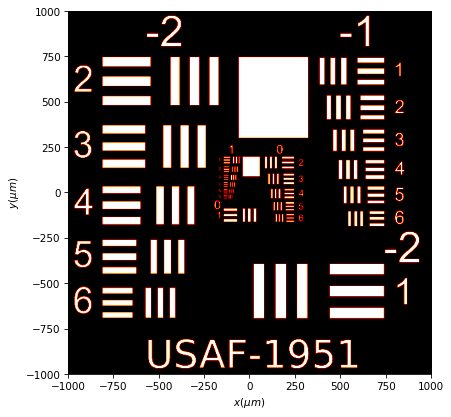

In [18]:
t0_usaf = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength, info='t0')
t0_usaf.image(filename='USAF-1951-1024.png', invert=True)
t0_usaf.draw(kind='intensity');

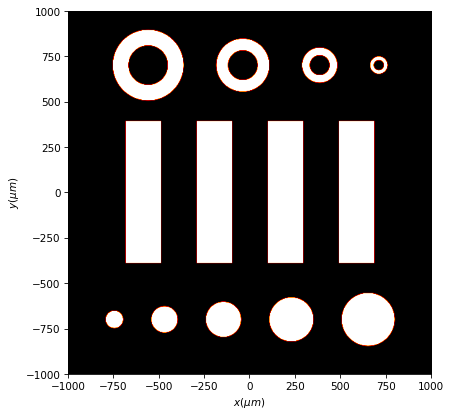

In [10]:
t0_litography = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength, info='t0')
t0_litography.image(filename='mascara1024.png', invert=False)
t0_litography.draw(kind='intensity');

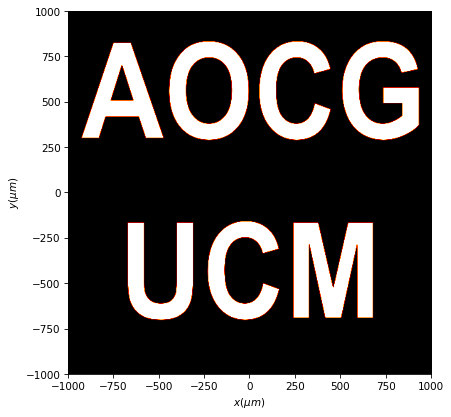

In [11]:
t0_AOCG = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength, info='t0')
t0_AOCG.image(filename='aocg_ucm.png', invert=False)
t0_AOCG.draw(kind='intensity');

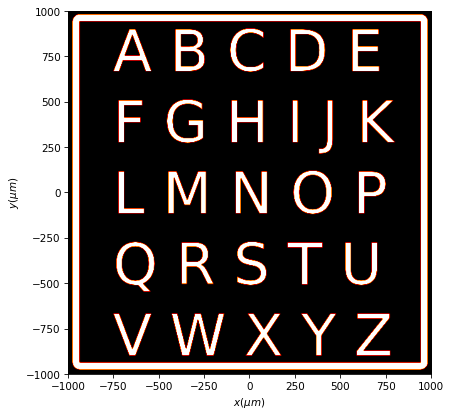

In [12]:
t0_ABCD = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength, info='t0')
t0_ABCD.image(filename='abecedario1024.png', invert=True)
t0_ABCD.draw(kind='intensity');

# Propagation

In [13]:
def propagation_mask_infinite(u0,
                              t0,
                              z_obs,
                              focal,
                              radius_lens,
                              z_between_lenses,
                              has_draw=True,
                              logarithm=0):

    t_lens0 = Scalar_mask_XY(x=u0.x, y=u0.y, wavelength=u0.wavelength)
    t_lens0.lens(r0=(0, 0), radius=(10 * mm, 10 * mm), focal=(focal, focal))

    t_lens1 = Scalar_mask_XY(x=u0.x, y=u0.y, wavelength=u0.wavelength)
    t_lens1.lens(
        r0=(0, 0), radius=(radius_lens, radius_lens), focal=(focal, focal))

    u1 = u0 * t0
    u2 = u1.RS(z=focal)
    u3 = u2 * t_lens0
    u4 = u3.RS(z=z_between_lenses, verbose=True)
    u5 = u4 * t_lens1
    u6 = u5.RS(z=z_obs, verbose=True)
    u6.draw(logarithm=logarithm)
    return u6

# Image formation at several points

## Usaf

Good result: factor 5.12
Good result: factor 6.39


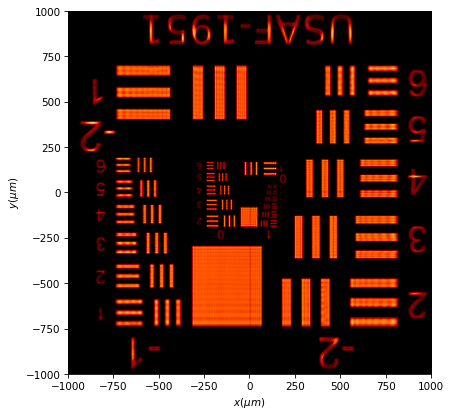

In [23]:
propagation_mask_infinite(
    u0,
    t0_usaf,
    z_obs=25 * mm,
    focal=25 * mm ,
    radius_lens=20* mm,
    z_between_lenses=20 * mm,
    has_draw=True)

Good result: factor 5.12
Good result: factor 6.39


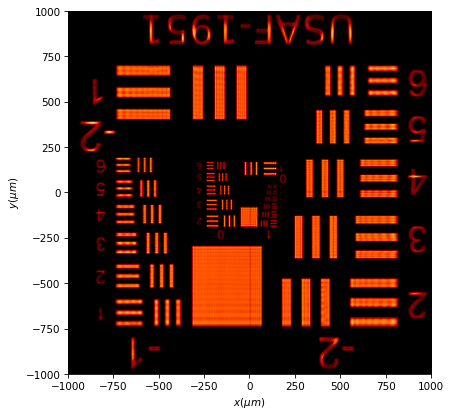

In [19]:
propagation_mask_infinite(
    u0,
    t0_usaf,
    z_obs=25 * mm,
    focal=25 * mm ,
    radius_lens=2* mm,
    z_between_lenses=20 * mm,
    has_draw=True)

Good result: factor 5.12
Good result: factor 6.39


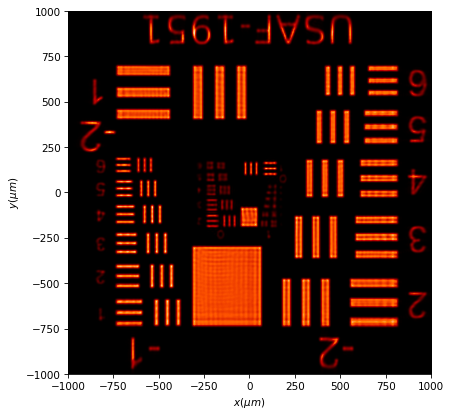

In [20]:
propagation_mask_infinite(
    u0,
    t0_usaf,
    z_obs=25 * mm,
    focal=25 * mm ,
    radius_lens=.5* mm,
    z_between_lenses=20 * mm,
    has_draw=True)

Good result: factor 5.12
Good result: factor 6.39


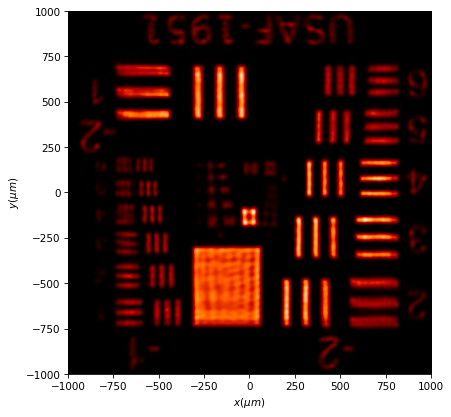

In [21]:
propagation_mask_infinite(
    u0,
    t0_usaf,
    z_obs=25 * mm,
    focal=25 * mm ,
    radius_lens=.25* mm,
    z_between_lenses=20 * mm,
    has_draw=True)

Good result: factor 5.12
Good result: factor 6.39


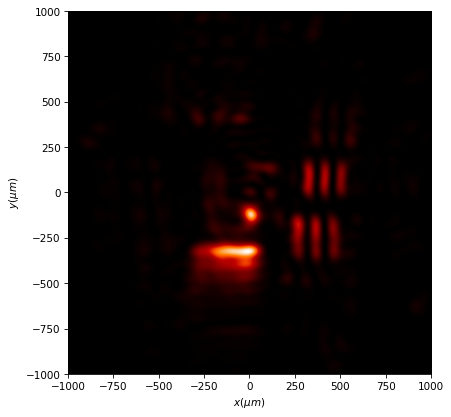

In [22]:
propagation_mask_infinite(
    u0,
    t0_usaf,
    z_obs=25 * mm,
    focal=25 * mm ,
    radius_lens=.1* mm,
    z_between_lenses=20 * mm,
    has_draw=True)

## Imágenes

Good result: factor 5.12
Good result: factor 6.39


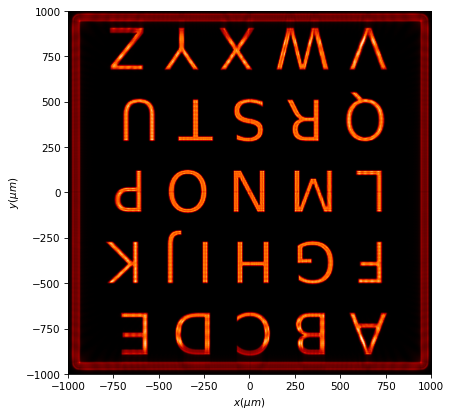

In [78]:
propagation_mask_infinite(
    u0,
    t0_ABCD,
    z_obs=25 * mm,
    focal=25 * mm ,
    radius_lens=2* mm,
    z_between_lenses=20 * mm,
    has_draw=True)

Good result: factor 5.12
Good result: factor 6.39


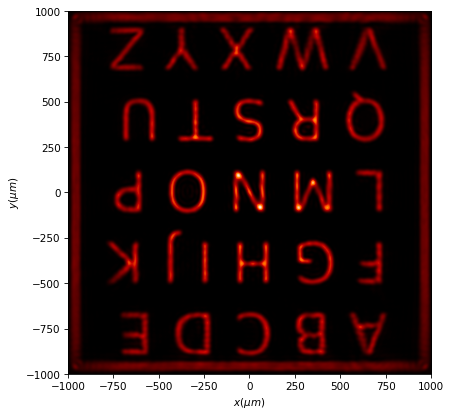

In [88]:
propagation_mask_infinite(
    u0,
    t0_ABCD,
    z_obs=25 * mm,
    focal=25 * mm ,
    radius_lens=.25* mm,
    z_between_lenses=20 * mm,
    has_draw=True)

Good result: factor 5.12
Good result: factor 7.15


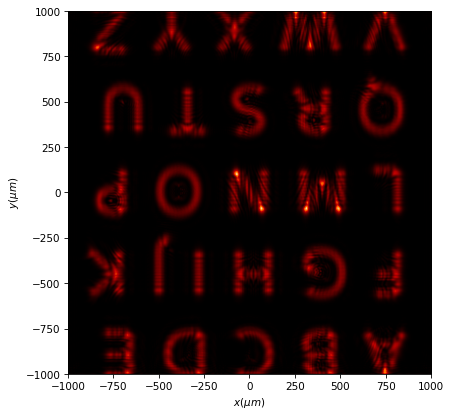

In [79]:
propagation_mask_infinite(
    u0,
    t0_ABCD,
    z_obs=25 * mm+3*mm,
    focal=25 * mm ,
    radius_lens=2* mm,
    z_between_lenses=20 * mm,
    has_draw=True)

## Lithography

Good result: factor 5.12
Good result: factor 7.66


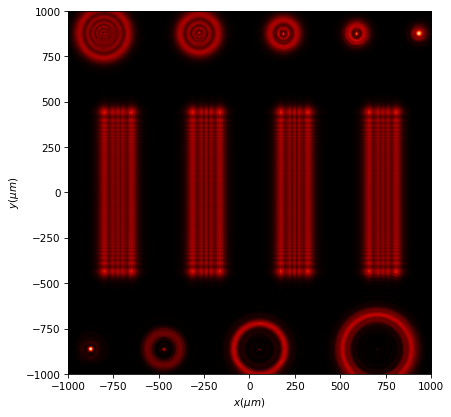

In [80]:
propagation_mask_infinite(
    u0,
    t0_litography,
    z_obs=25 * mm+5*mm,
    focal=25 * mm ,
    radius_lens=2* mm,
    z_between_lenses=20 * mm,
    has_draw=True)

## PSF

Good result: factor 5.12
Good result: factor 6.39


(-150.0, 150.0)

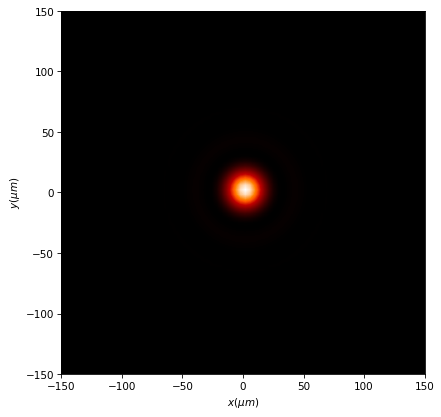

In [95]:
u_prop_foco = propagation_mask_infinite(
    u0,
    t0_point,
    z_obs=25 * mm,
    focal=25 * mm,
    radius_lens=.25 * mm,
    z_between_lenses=20 * mm,
    has_draw=True)

plt.xlim(-150,150)
plt.ylim(-150,150)

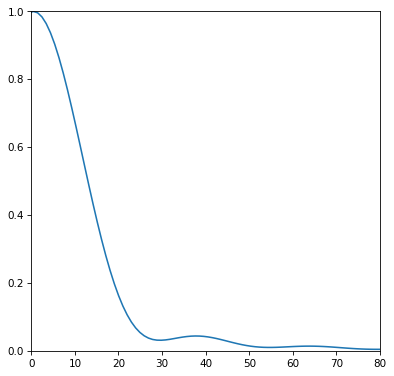

In [130]:
intensidad1=u_prop_foco.intensity().sum(axis=0)
intensidad1=intensidad1/intensidad1.max()
plt.plot(u0.x, intensidad1)
plt.xlim(0,80)
plt.ylim(0,1);

Good result: factor 5.12
Good result: factor 7.66


(-200.0, 200.0)

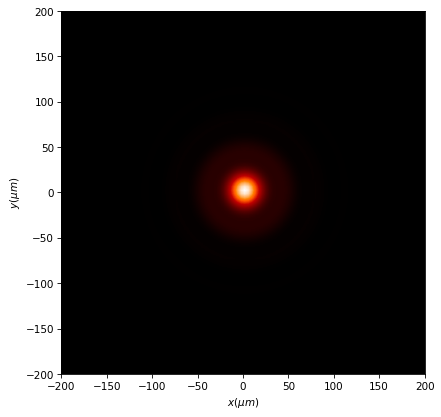

In [141]:
u_prop_out2 = propagation_mask_infinite(
    u0,
    t0_point,
    z_obs=25 * mm+5*mm,
    focal=25 * mm,
    radius_lens=.25*mm,
    z_between_lenses=20 * mm,
    has_draw=True, logarithm=4)
plt.xlim(-200,200)
plt.ylim(-200,200);

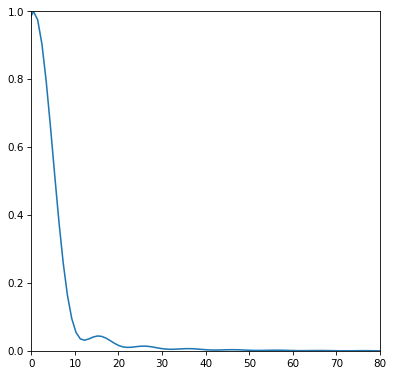

In [131]:
intensidad2=u_prop_out2.intensity().sum(axis=0)
intensidad2=intensidad2/intensidad2.max()
plt.plot(u0.x, intensidad2)
plt.xlim(0,80)
plt.ylim(0,1);

Good result: factor 5.12
Good result: factor 2.58


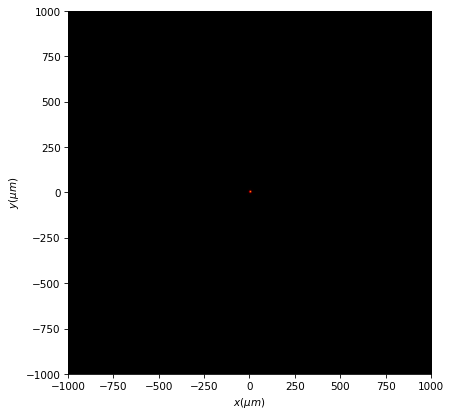

In [124]:
u_prop_out3 = propagation_mask_infinite(
    u0,
    t0_point,
    z_obs=10 * mm,
    focal=10 * mm,
    radius_lens=250*um,
    z_between_lenses=20 * mm,
    has_draw=True)

(0.0, 1.0)

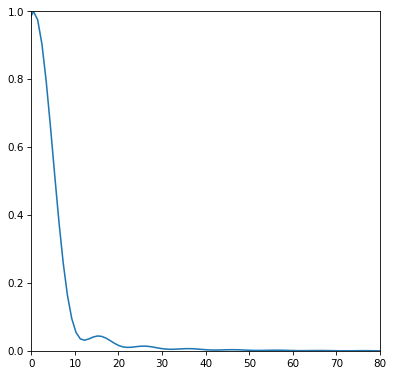

In [132]:
intensidad3=u_prop_out3.intensity().sum(axis=0)
intensidad3=intensidad3/intensidad3.max()
plt.plot(u0.x, intensidad3)
plt.xlim(0,80)
plt.ylim(0,1)